In [16]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import heartpy as hp
import pickle
import json

In [17]:
dataset_dir = "../../data_set"
data_dir = {}
processed_data_dir = {}
for file in os.listdir(dataset_dir):
    f = os.path.join(dataset_dir, file)
    participant_num = f.split('.')[-2].split("subject_")[-1]
    f_open = open(f)
    data_dir["participant_" + participant_num] = json.load(f_open)
    f_open.close()
    print("Loaded " + str(file))

Loaded subject_1.json
Loaded subject_10.json
Loaded subject_11.json
Loaded subject_12.json
Loaded subject_13.json
Loaded subject_14.json
Loaded subject_15.json
Loaded subject_16.json
Loaded subject_17.json
Loaded subject_18.json
Loaded subject_19.json
Loaded subject_2.json
Loaded subject_20.json
Loaded subject_21.json
Loaded subject_22.json
Loaded subject_23.json
Loaded subject_3.json
Loaded subject_4.json
Loaded subject_5.json
Loaded subject_6.json
Loaded subject_7.json
Loaded subject_8.json
Loaded subject_9.json


In [18]:
def plot_raw(participant_num, clip_num):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    fig.suptitle('clip #'+str(clip_num) , fontsize=15)
    
    axes[0].plot(data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num][0:1024])
    axes[0].set_title('participant_'+str(participant_num) + ' baseline')
    
    axes[1].plot(data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num][0:1024])
    axes[1].set_title('participant_'+str(participant_num) + ' stimuli')
    
    
def plot_raw_filtered(participant_num, clip_num):
    
    processed_data_dir['participant_'+str(participant_num)] = {}
    processed_data_dir['participant_'+str(participant_num)]['ECG'] = {} 
    processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'] = {} 
    processed_data_dir['participant_'+str(participant_num)]['ECG']['baseline'] = {} 
#     processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    fig.suptitle('clip #'+str(clip_num) , fontsize=15)
    
    ch1 = [row[0] for row in data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num]]
    ch2 = [row[1] for row in data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num]]
    
    
    ch1_filtered = hp.remove_baseline_wander(ch1, 256)
    ch2_filtered = hp.remove_baseline_wander(ch2, 256)
    result = np.column_stack((ch1_filtered, ch2_filtered))
    
    processed_data_dir['participant_'+str(participant_num)]['ECG']['baseline'][str(clip_num)] = result
    
    axes[0].plot(result[0:1024])
    axes[0].set_title('participant_'+str(participant_num) + ' baseline')
    
    ch1 = [row[0] for row in data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]]
    ch2 = [row[1] for row in data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]]
    
    ch1_filtered = hp.remove_baseline_wander(ch1, 256)
    ch2_filtered = hp.remove_baseline_wander(ch2, 256)
    result = np.column_stack((ch1_filtered, ch2_filtered))
    axes[1].plot(result[0:1024])
    axes[1].set_title('participant_'+str(participant_num) + ' stimuli')
    
    processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][str(clip_num)] = result
    
    

In [ ]:
data_dir['participant_1']['ECG']['baseline'][1]

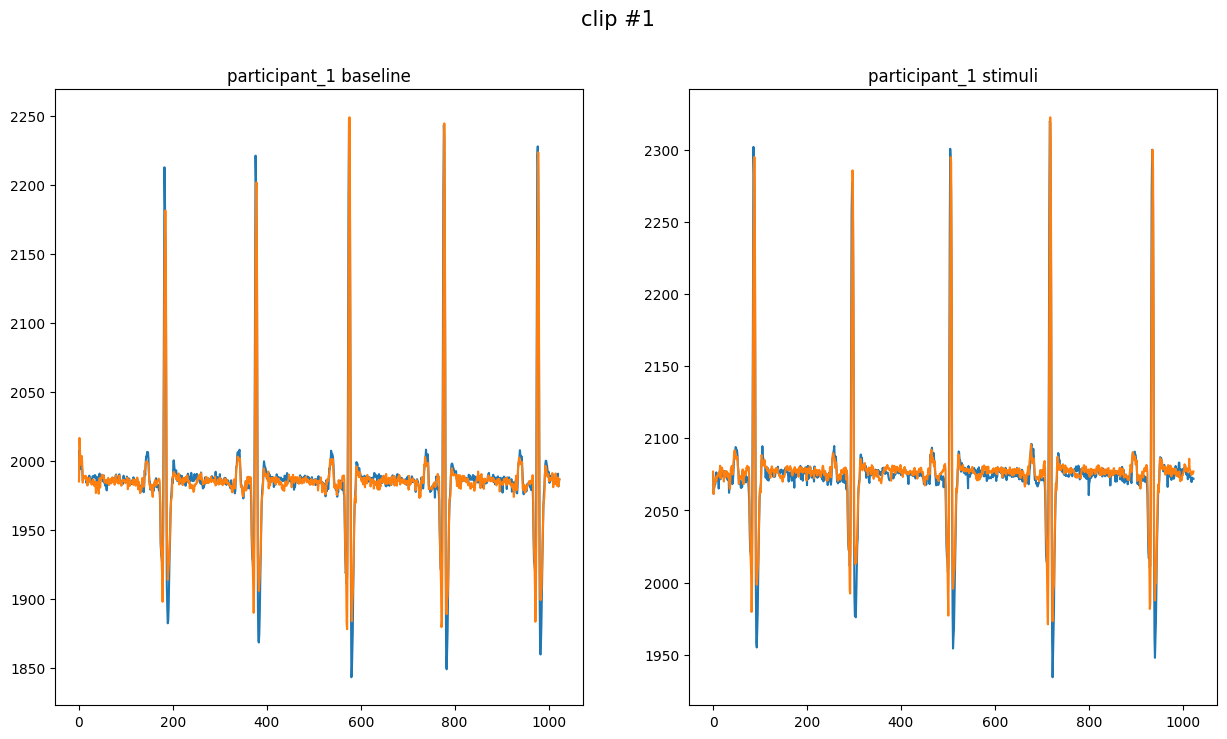

In [19]:
for i in range(1,2):
        plot_raw_filtered(1, i)
#matplotlib.pyplot.close()

In [ ]:
# Test
p1_ch1_clip1 = [row[0] for row in data_dir['participant_'+str(1)]['ECG']['baseline'][1]]
p1_ch1_clip1_filtered = hp.remove_baseline_wander(p1_ch1_clip1, 256)
result = np.column_stack((p1_ch1_clip1, p1_ch1_clip1_filtered))
plt.figure(figsize=(10, 10))
plt.plot(result[0:1024])

### Generate .pkl with data from all participants

In [20]:
def drop_EEG_data ():
    for participant in data_dir:
        data_dir[participant].pop('EEG')
        print(participant + " Dropped EEG Data")
        
drop_EEG_data ()

participant_1 Dropped EEG Data
participant_10 Dropped EEG Data
participant_11 Dropped EEG Data
participant_12 Dropped EEG Data
participant_13 Dropped EEG Data
participant_14 Dropped EEG Data
participant_15 Dropped EEG Data
participant_16 Dropped EEG Data
participant_17 Dropped EEG Data
participant_18 Dropped EEG Data
participant_19 Dropped EEG Data
participant_2 Dropped EEG Data
participant_20 Dropped EEG Data
participant_21 Dropped EEG Data
participant_22 Dropped EEG Data
participant_23 Dropped EEG Data
participant_3 Dropped EEG Data
participant_4 Dropped EEG Data
participant_5 Dropped EEG Data
participant_6 Dropped EEG Data
participant_7 Dropped EEG Data
participant_8 Dropped EEG Data
participant_9 Dropped EEG Data


In [21]:
data_dir['participant_1']['ECG']['stimuli'][1]

[[2054, 2061],
 [2036, 2041],
 [2036, 2041],
 [2035, 2039],
 [2034, 2040],
 [2032, 2038],
 [2036, 2039],
 [2037, 2035],
 [2030, 2037],
 [2029, 2036],
 [2030, 2036],
 [2030, 2037],
 [2021, 2035],
 [2030, 2037],
 [2032, 2034],
 [2036, 2041],
 [2027, 2032],
 [2031, 2038],
 [2032, 2037],
 [2030, 2039],
 [2029, 2037],
 [2028, 2036],
 [2028, 2033],
 [2029, 2028],
 [2032, 2035],
 [2031, 2031],
 [2032, 2034],
 [2028, 2036],
 [2029, 2035],
 [2029, 2037],
 [2029, 2037],
 [2027, 2034],
 [2032, 2037],
 [2032, 2038],
 [2020, 2034],
 [2026, 2031],
 [2028, 2032],
 [2036, 2044],
 [2042, 2052],
 [2045, 2055],
 [2048, 2059],
 [2042, 2056],
 [2046, 2058],
 [2054, 2067],
 [2065, 2073],
 [2074, 2081],
 [2074, 2082],
 [2080, 2082],
 [2084, 2076],
 [2083, 2076],
 [2079, 2072],
 [2077, 2071],
 [2070, 2067],
 [2058, 2057],
 [2050, 2049],
 [2037, 2038],
 [2034, 2038],
 [2031, 2036],
 [2026, 2034],
 [2019, 2031],
 [2016, 2027],
 [2016, 2025],
 [2013, 2023],
 [2023, 2028],
 [2014, 2019],
 [2015, 2015],
 [2014, 20

In [23]:
with open('../../data_set_raw_ECG/raw_data_dict.pkl', 'wb') as f:
    pickle.dump(data_dir, f)

with open('../../data_set_raw_ECG/raw_data_dict.json', 'w') as f:
    json.dump(data_dir, f)

In [ ]:
data_dir['participant_23']['ECG'].keys()
len(data_dir['participant_23']['ECG']['baseline'])

# Display Graphs

In [ ]:
def valance_arousal_dominance (participant_num, clip_num):
    plt.plot(data_dir['participant_'+str(participant_num)]['ScoreValence'][clip_num][0:1024])
    plt.plot(data_dir['participant_'+str(participant_num)]['ScoreArousal'][clip_num][0:1024])
    plt.plot(data_dir['participant_'+str(participant_num)]['ScoreDominance'][clip_num][0:1024])
valance_arousal_dominance(1,1)

In [ ]:
data_dir['participant_1']['ScoreDominance']